<a href="https://colab.research.google.com/github/rite2babu/ML/blob/main/Cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
!ls

!ls /root/.kaggle
!rm /root/.kaggle
!mkdir /root/.kaggle

kaggle.json  sample_data
/root/.kaggle


In [ ]:
## follow this to download kaggle data set, which also need python upgrade.
!pip install --upgrade --force-reinstall --no-deps kaggle

#copy kaggle.json in to current folder manually...and then this....
!cp ./kaggle.json /root/.kaggle

!kaggle competitions download -c cassava-leaf-disease-classification

#!pwd

#!ls /content

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=dff61e0b7158ba10442c616ac1bd512ce7343113e829ab4bb14ca3cd624923a0
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
100% 5.76G/5.76G [01:21<00:00, 132MB/s]
100% 5.76G/5.76G [01:21<00:00, 76.0MB/s]


In [ ]:
##Un comment this code to extract the data set.
#!ls
#!unzip ./cassava-leaf-disease-classification.zip 
!ls ./train_tfrecords/


ld_train00-1338.tfrec  ld_train06-1338.tfrec  ld_train12-1338.tfrec
ld_train01-1338.tfrec  ld_train07-1338.tfrec  ld_train13-1338.tfrec
ld_train02-1338.tfrec  ld_train08-1338.tfrec  ld_train14-1338.tfrec
ld_train03-1338.tfrec  ld_train09-1338.tfrec  ld_train15-1327.tfrec
ld_train04-1338.tfrec  ld_train10-1338.tfrec
ld_train05-1338.tfrec  ld_train11-1338.tfrec


In [ ]:
import tensorflow as tf
import glob

PATH = './train_tfrecords/'

files = glob.glob(PATH+'*.tfrec')
print(files)
tfrds = tf.data.TFRecordDataset(files)


['./train_tfrecords/ld_train02-1338.tfrec', './train_tfrecords/ld_train10-1338.tfrec', './train_tfrecords/ld_train07-1338.tfrec', './train_tfrecords/ld_train01-1338.tfrec', './train_tfrecords/ld_train12-1338.tfrec', './train_tfrecords/ld_train05-1338.tfrec', './train_tfrecords/ld_train13-1338.tfrec', './train_tfrecords/ld_train14-1338.tfrec', './train_tfrecords/ld_train15-1327.tfrec', './train_tfrecords/ld_train08-1338.tfrec', './train_tfrecords/ld_train06-1338.tfrec', './train_tfrecords/ld_train00-1338.tfrec', './train_tfrecords/ld_train04-1338.tfrec', './train_tfrecords/ld_train03-1338.tfrec', './train_tfrecords/ld_train11-1338.tfrec', './train_tfrecords/ld_train09-1338.tfrec']


In [ ]:
print(tfrds)

<TFRecordDatasetV2 shapes: (), types: tf.string>


In [ ]:

#test print the records in the file...
for tfrds_example in tfrds.take(4):
  print(tfrds_example)
  
  

tf.Tensor(b'\n\x84\xc9\r\n\xcd\xc8\r\n\x05image\x12\xc2\xc8\r\n\xbe\xc8\r\n\xba\xc8\r\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x02\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x06\x07\x04\x05\x08\x03\x02\t\x01\x00\n\xff\xc4\x00K\x10\x00\x01\x04\x01\x03\x03\x03\x02\x05\x02\x04\x04\x04\x03\x02\x0f\x01\x02\x03\x04\x05\x06\x07\x11\x12\x00\x08!\x13"1\x14A\t\x15#2Q\x16aBRq\x81\x17$3\x91Cbr\xa1\x18%\xc14S\x82\xa2\xb1\xd1\nDc\x92\xe1\x195Ts\xb2\xf0\xff\x

In [ ]:
import tensorflow as tf

# Refer this sample https://www.tensorflow.org/tutorials/load_data/tfrecord

#This is the format of tfrecrods (it simply has image, and image_name)
image_feature_description = {
    'image_name': tf.io.FixedLenFeature([], tf.string),
    'image': tf.io.FixedLenFeature([], tf.string),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_dataset = tfrds.map(_parse_function)

In [ ]:
import numpy as np

tf.Tensor(b'1465908426.jpg', shape=(), dtype=string)
(512, 512, 3)


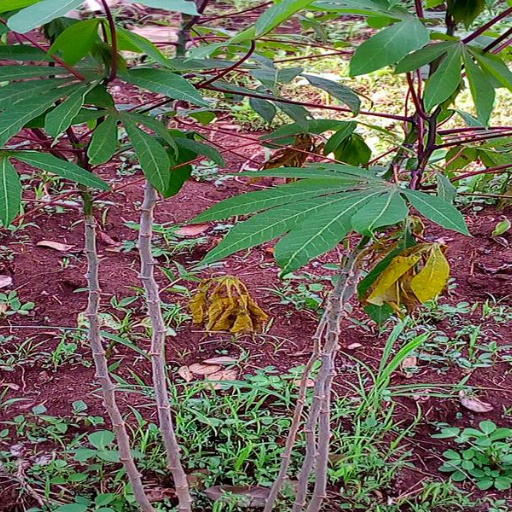

tf.Tensor(b'1466028041.jpg', shape=(), dtype=string)
(512, 512, 3)


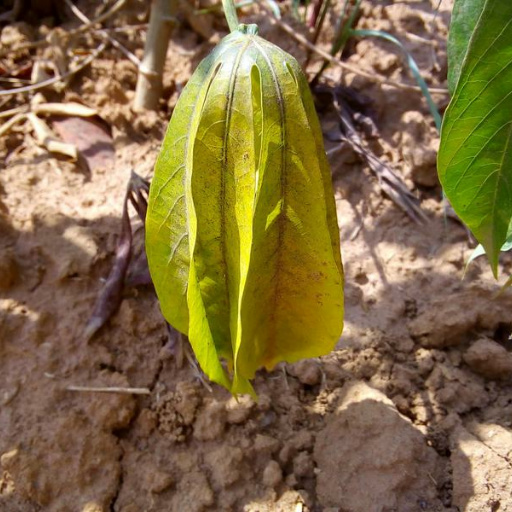

tf.Tensor(b'146632116.jpg', shape=(), dtype=string)
(512, 512, 3)


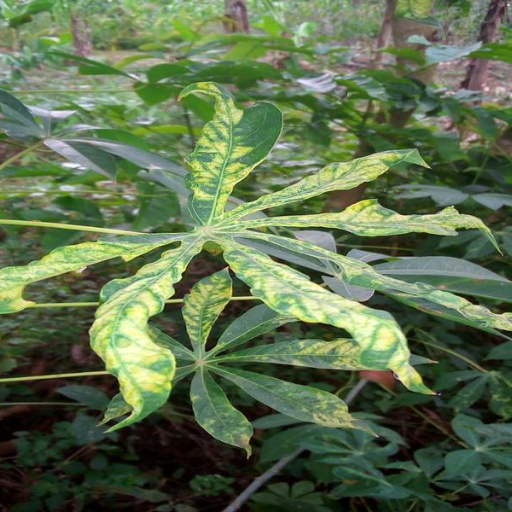

tf.Tensor(b'1466391339.jpg', shape=(), dtype=string)
(512, 512, 3)


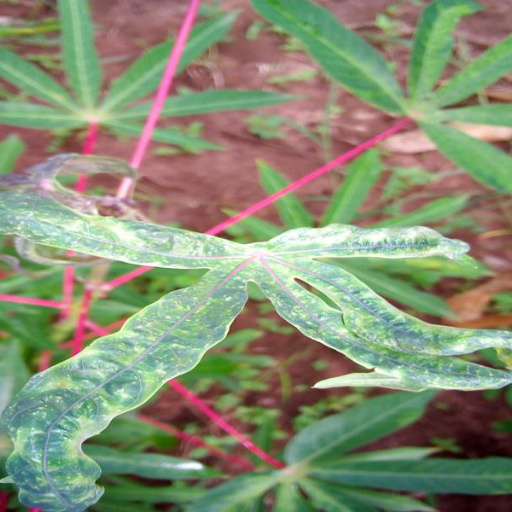

tf.Tensor(b'1466509745.jpg', shape=(), dtype=string)
(512, 512, 3)


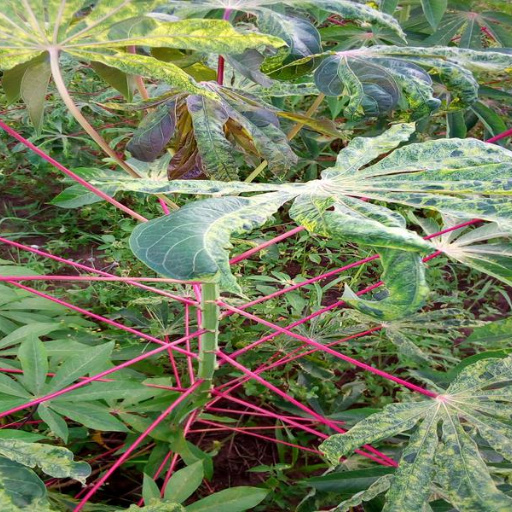

tf.Tensor(b'1466655821.jpg', shape=(), dtype=string)
(512, 512, 3)


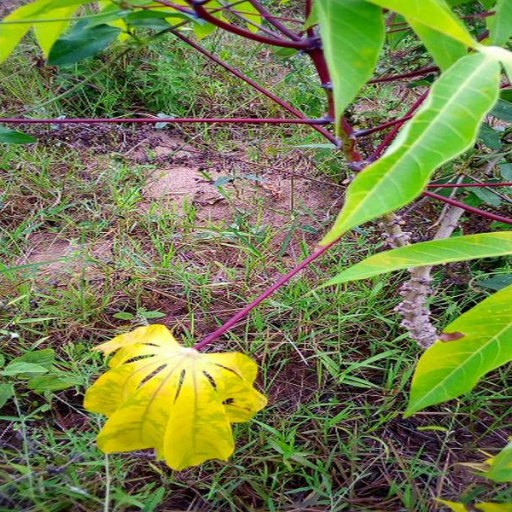

tf.Tensor(b'1466991020.jpg', shape=(), dtype=string)
(512, 512, 3)


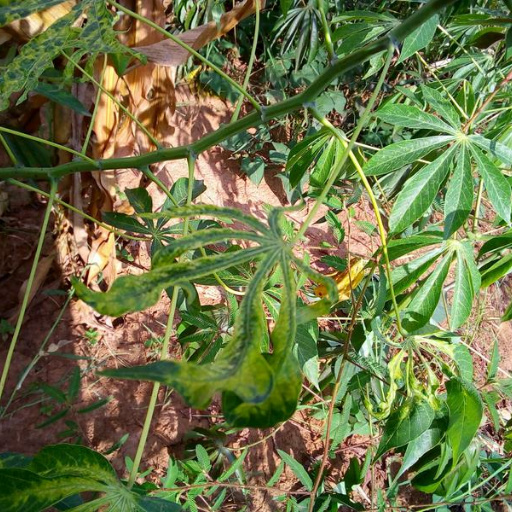

tf.Tensor(b'1467013216.jpg', shape=(), dtype=string)
(512, 512, 3)


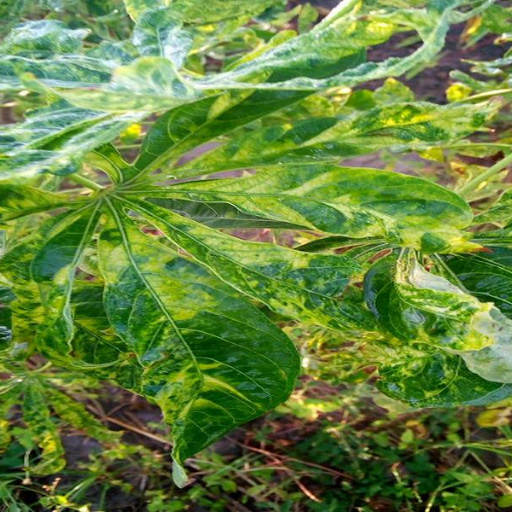

tf.Tensor(b'1467290004.jpg', shape=(), dtype=string)
(512, 512, 3)


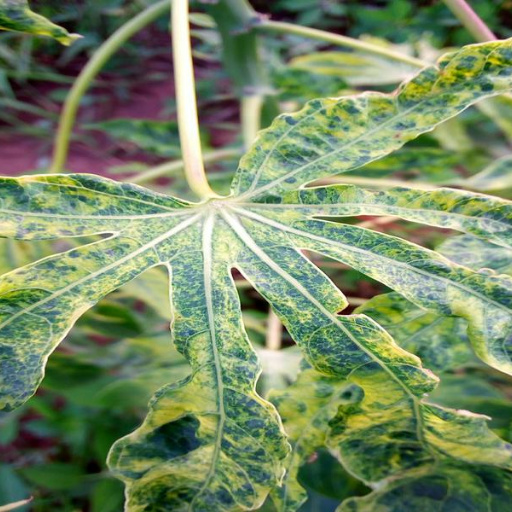

tf.Tensor(b'1467601507.jpg', shape=(), dtype=string)
(512, 512, 3)


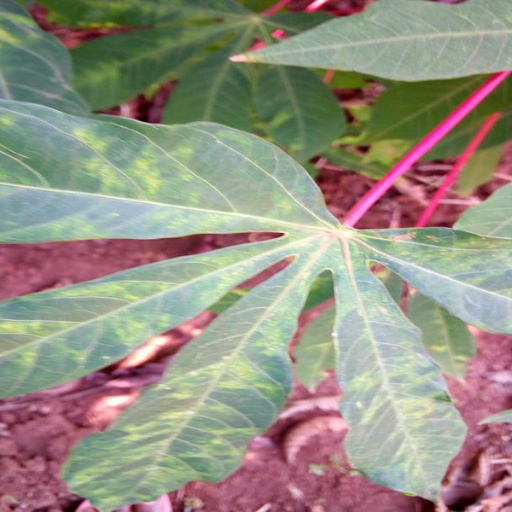

In [108]:
import IPython.display as display
import matplotlib.pyplot as plt

#parsed_dataset

for i in parsed_dataset.take(10):
  #print(repr(i))
  img = i['image'].numpy()
  print(i['image_name'])
  #plt.imshow(img)
  d = tf.io.decode_jpeg(img)
  #print(type(d))
  #print(d)
  #d is a standard size ...W*H*D model
  print(d.shape)
  f = display.Image(img)
  display.display( f)
  

In [ ]:
! ls

In [ ]:
!ls train.csv
!type train.csv